In [1]:
# 필요 라이브러리 import 
import pandas as pd
import numpy as np
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../../dataset/Same_Undersampling.csv',encoding='CP949')

In [3]:
df

,[제조]노동소득분배율,[제조]자기자본배율,[제조]현금비율,[제조]자기자본증가율,[제조]총자본증가율,[제조]재고자산증가율,[제조]매출액순이익률,[제조]매입채무회전기간,[제조]재고자산회전기간,[제조]비유동자산회전률,label
0,-0.680366,0.364327,-0.551356,0.127162,0.082208,-0.217657,0.568340,2.311054,0.087583,-0.826928,0
1,-0.510463,0.372378,-0.700173,-0.082138,0.042988,-0.069416,0.284942,1.467702,0.830181,-0.006370,0
2,-1.430155,-0.927537,-0.772674,-2.150465,0.680942,-0.210768,-4.391570,-1.394061,-1.160594,-1.044134,0
3,-0.212902,0.252307,2.601317,0.183011,0.215724,0.120873,0.621168,-0.968750,-0.083108,-0.302012,0
4,0.204930,-0.082687,2.117363,-0.097591,-0.067580,-0.042096,0.507633,-1.062809,1.360110,-0.235643,0
...,...,...,...,...,...,...,...,...,...,...,...
1788,-1.430155,-1.148362,-0.568856,-2.791921,-2.321910,-1.464874,-1.627341,2.311054,1.111728,-0.277878,1
1789,2.826654,-0.478738,-0.562672,-0.669371,0.269547,1.188729,-0.977071,0.495756,1.724684,-0.428716,1
1790,-1.002627,2.585154,2.955926,-0.106538,-0.307491,0.069797,0.407524,-0.129487,-1.140881,2.666476,1
1791,-1.430155,-0.969556,0.525237,-1.252536,-2.061554,-0.633871,-0.600569,-0.298521,-0.921024,0.784020,1


In [4]:
from sklearn.model_selection import train_test_split
Same_X = df.iloc[:,:-1]
Same_y = df['label']

In [5]:
Same_X_train, Same_X_test, Same_y_train, Same_y_test = train_test_split(Same_X, Same_y, test_size=0.2, random_state=0)

In [6]:
# 기본적인 LDA 구현
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda_clf = LinearDiscriminantAnalysis()
lda_clf.fit(Same_X_train,Same_y_train)
lda_pred = lda_clf.predict(Same_X_test)
lda_pred_proba = lda_clf.predict_proba(Same_X_test)

In [7]:
from sklearn.model_selection import GridSearchCV


In [8]:
# 디시전트리 구현
from sklearn.tree import DecisionTreeClassifier       
dt_clf = DecisionTreeClassifier(random_state=52)     
dt_clf.fit(Same_X_train, Same_y_train)
dt_pred = dt_clf.predict(Same_X_test)
dt_pred_proba = dt_clf.predict_proba(Same_X_test)

In [40]:

tree = DecisionTreeClassifier()

# 딕셔너리로 전달
# key: 하이퍼파라미터 명; value: [후보값들] 을 리스트로 전달
param_grid = {
    'max_depth':[2,3,4,5,6,7,8], #7개
    'min_samples_leaf':[5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]  #4개 --> 7x4 = 총 28개의 조합
}
grid_search = GridSearchCV(tree
                          , param_grid = param_grid
                          , cv = 5 #교차검증시 fold 개수; n번의 교차검증; 데이터들이 돌아가면서 하나씩 검증(validation)에 사용되어 일반화하는 것; 데이터가 많지 않을 때 보통 쓰인다고 함
                          , n_jobs = -1)  #-1: 모든 코어 사용

grid_search.fit(Same_X_train, Same_y_train)

# 최선의 결과 출력
print('최적 하이퍼 파라미터 :{0}, 최적 평균 정확도 :{1:.3f}'.format(grid_search.best_params_, grid_search.best_score_))

최적 하이퍼 파라미터 :{'max_depth': 2, 'min_samples_leaf': 13}, 최적 평균 정확도 :0.934


In [9]:
#최적 하이퍼 파라미터 :{'max_depth': 3, 'min_samples_leaf': 6}, 최적 평균 정확도 :0.941
  
dt_clf_best = DecisionTreeClassifier(random_state=52,max_depth= 2,min_samples_leaf=13)     
dt_clf_best.fit(Same_X_train, Same_y_train)
dt_best_pred = dt_clf_best.predict(Same_X_test)
dt_best_pred_proba = dt_clf_best.predict_proba(Same_X_test)

In [10]:
# 랜덤포레스트 구현
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=52)     
rf_clf.fit(Same_X_train, Same_y_train)
rf_pred = rf_clf.predict(Same_X_test)
rf_pred_proba = rf_clf.predict_proba(Same_X_test)

In [43]:
# 하이퍼파라미터 Grid-Search
from sklearn.model_selection import GridSearchCV

# 탐색 범위 정의
grid_search = {'criterion': ['entropy', 'gini'],
               'max_depth': [2,4,6,8],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [4,6,8.10],
               'min_samples_split': [4,6,8,10],
               'n_estimators': [20,40,60,80,100]}

model = RandomForestClassifier()
grid = GridSearchCV(estimator = model, param_grid = grid_search, 
                               cv = 4,verbose=0, n_jobs = -1)
grid.fit(Same_X_train,Same_y_train)

# 최선의 결과 출력
print('최적 하이퍼 파라미터 :{0}, 최적 평균 정확도 :{1:.3f}'.format(grid.best_params_, grid.best_score_))


최적 하이퍼 파라미터 :{'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 6, 'n_estimators': 20}, 최적 평균 정확도 :0.935


In [11]:
# 최적 하이퍼 파라미터 :{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 6, 'n_estimators': 20}, 최적 평균 정확도 :0.957
rf_clf_best = RandomForestClassifier(random_state=52, criterion = 'gini', max_features= 'sqrt',
                                     max_depth=4, min_samples_leaf=4, min_samples_split=6, n_estimators=20)
rf_clf_best.fit(Same_X_train, Same_y_train)
rf_best_pred = rf_clf_best.predict(Same_X_test)
rf_best_pred_proba = rf_clf_best.predict_proba(Same_X_test)

In [12]:
# 로지스틱 회귀 모델
from sklearn.linear_model import LogisticRegression
#로지스틱 회귀를 위한 스케일링 
lr_clf = LogisticRegression()
lr_clf.fit(Same_X_train, Same_y_train)
lr_pred = lr_clf.predict(Same_X_test)
lr_pred_proba = lr_clf.predict_proba(Same_X_test)


In [47]:
#로지스틱 회귀 최적 하이퍼 파라미터
from sklearn.model_selection import GridSearchCV

params = {'penalty': ['l2','l1','elasticnet','None'],
          'C':[0.01,0.1,1,1,5,10]}

grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=5)
grid_clf.fit(Same_X_train,Same_y_train)
print('최적 하이퍼 파라미어:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_, grid_clf.best_score_))

최적 하이퍼 파라미어:{'C': 0.1, 'penalty': 'l2'}, 최적 평균 정확도:0.925


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
90 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "c:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 61, in _check_solver
    raise ValueError(
Valu

In [13]:
#최적 하이퍼 파라미어:{'C': 0.01, 'penalty': 'l2'}, 최적 평균 정확도:0.982
# 로지스틱 회귀 모델
from sklearn.linear_model import LogisticRegression
#로지스틱 회귀를 위한 스케일링 
lr_clf = LogisticRegression(C = 0.1, penalty= 'l2')
lr_clf.fit(Same_X_train, Same_y_train)
lr_best_pred = lr_clf.predict(Same_X_test)
lr_best_pred_proba = lr_clf.predict_proba(Same_X_test)

In [14]:
# KNN 모형 구현
# 3. 거리 계산을 위해서 각 특성들을 스케일링(표준화) [Z-score 표준화: 평균을 0, 표준편차 1로 변환]
from sklearn.neighbors import KNeighborsClassifier

# k-NN 분류기를 생성
knn_clf = KNeighborsClassifier(n_neighbors=5)
# 분류기 학습
knn_clf.fit(Same_X_train, Same_y_train)
# 예측

knn_pred = knn_clf.predict(Same_X_test)
knn_pred_proba = knn_clf.predict_proba(Same_X_test)


In [15]:
# knn 파라미터 구하기
from sklearn.metrics import accuracy_score
for k in range(1,11):
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(Same_X_train, Same_y_train)
    knn_pred = knn_clf.predict(Same_X_test)
    knn_score=accuracy_score(Same_y_test,knn_pred)
    print(k)
    print(knn_score)
    
    

1
0.9220055710306406
2
0.9331476323119777
3
0.935933147632312
4
0.9387186629526463
5
0.9387186629526463
6
0.9387186629526463
7
0.9387186629526463
8
0.9415041782729805
9
0.9415041782729805
10
0.9415041782729805


In [16]:
# knn 최적의 파라미터 모델
knn_clf = KNeighborsClassifier(n_neighbors=10)
# 분류기 학습
knn_clf.fit(Same_X_train, Same_y_train)
# 예측

knn_best_pred = knn_clf.predict(Same_X_test)
knn_best_pred_proba = knn_clf.predict_proba(Same_X_test)


In [60]:
Same_X_train.columns

Index(['[제조]노동소득분배율', '[제조]자기자본배율', '[제조]현금비율', '[제조]자기자본증가율', '[제조]총자본증가율',
       '[제조]재고자산증가율', '[제조]매출액순이익률', '[제조]매입채무회전기간', '[제조]재고자산회전기간',
       '[제조]비유동자산회전률'],
      dtype='object')

In [17]:
#XG 부스트 모형 구현
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import xgboost as xgb ## XGBoost 불러오기
from xgboost import plot_importance 
Same_x_train2 = Same_X_train.copy()
Same_x_test2 = Same_X_test.copy()
Same_y_train2 = Same_y_train.copy()
Same_y_test2 = Same_y_test.copy()
Same_x_train2.columns = [['노동소득분배율', '자기자본배율', '현금비율', '자기자본증가율', '총자본증가율',
       '재고자산증가율', '매출액순이익률', '매입채무회전기간', '재고자산회전기간',
       '비유동자산회전률']]
Same_x_test2.columns =[['노동소득분배율', '자기자본배율', '현금비율', '자기자본증가율', '총자본증가율',
       '재고자산증가율', '매출액순이익률', '매입채무회전기간', '재고자산회전기간',
       '비유동자산회전률']]

# df1 = df[df['year']<2019] #train
# df2 = df[df['year']>=2019] #test
# train data label 분리 test data label 분리
params_dict = {'objective' : 'binary:logistic',
               'n_estimators' : 400,
               'learning_rate' : 0.05,
               'max_depth' : 3,
               'eval_metric' : 'logloss'
               }

xgb_wrapper = XGBClassifier(Param=params_dict)

xgb_wrapper.fit(Same_x_train2, Same_y_train2, verbose = True)


xgb_pred = xgb_wrapper.predict(Same_X_test)
xgb_pred_proba = xgb_wrapper.predict_proba(Same_X_test)




[15:14:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [70]:
# xgb 최적 하이퍼 파라미터
from sklearn.model_selection import GridSearchCV

params = {
          'n_estimators':[20,40,60,80,100],
          'learning_rate':[0.05,0.1,0.15],
          'max_depth' : [3,4,5,6]
          }

grid_clf = GridSearchCV(xgb_wrapper, param_grid=params, scoring='accuracy', cv=5)
grid_clf.fit(Same_x_train2,Same_y_train2)
print('최적 하이퍼 파라미어:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_, grid_clf.best_score_))

[17:31:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:31:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:31:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "Param" } might not be used.

  This could be a false al

In [18]:
# 최적 하이퍼 파라미어:{'learning_rate': 0.09, 'max_depth': 6, 'n_estimators': 100}, 최적 평균 정확도:0.957
xgb_wrapper = XGBClassifier(learning_rate= 0.05, max_depth= 3, n_estimators= 20)

xgb_wrapper.fit(Same_x_train2, Same_y_train2, verbose = True)

xgb_best_pred = xgb_wrapper.predict(Same_X_test)
xgb_best_pred_proba = xgb_wrapper.predict_proba(Same_X_test)

In [22]:
Same_y_train.reset_index(drop=True, inplace=True)
Same_y_test.reset_index(drop=True, inplace=True)
Same_X_train.reset_index(drop=True, inplace=True)
Same_X_test.reset_index(drop=True, inplace=True)

In [23]:
#퍼셉트론 구현
# eta : 학습률 (float), n_iter : 훈련 데이터 반복 횟수 (int), w_ : 학습된 가중치 (1d-array)
class Perceptron(object):
    
    def __init__(self, eta = 0.01, n_iter = 50, random_state = 1): #초기화
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    
    def fit(self, X, y): #학습
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc = 0, scale = 0.01,
                             size = 1 + X.shape[1])
        
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for i in range(len(X)):
                xi = X.iloc[i].values
                target = y[i]
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def predict(self, X): #추론
        return np.where(self.net_input(X) >= 0.0, 1, 0)
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]



#초기(pc)
pc_clf = Perceptron(n_iter = 10)
pc_clf.fit(Same_X_train, Same_y_train)
pc_pred = pc_clf.predict(Same_X_test)






In [24]:
from sklearn.metrics import accuracy_score

pc_scores = []
for i in range(1,11):
    pc_clf = Perceptron(n_iter=i)
    pc_clf.fit(Same_X_train, Same_y_train)
    pc_pred = pc_clf.predict(Same_X_test)
    
    pc_scores=accuracy_score(Same_y_test, pc_pred)
    print(i)
    print(pc_scores)



1
0.8997214484679665
2
0.883008356545961
3
0.9220055710306406
4
0.8857938718662952
5
0.8913649025069638
6
0.9136490250696379
7
0.8885793871866295
8
0.9275766016713092
9
0.9192200557103064
10
0.9025069637883009


In [25]:
# 퍼셉트론 최적의 파라미터
pc_clf = Perceptron(n_iter = 9)
pc_clf.fit(Same_X_train, Same_y_train)
pc_best_pred = pc_clf.predict(Same_X_test)



### lda_pred : 선형판별 분석 예측 값
### dt_pred : 디시전트리 예측 값
### dt_best_pred : 랜덤 포레스트 최적의 파라미터 값
### rf_pred : 랜덤 포레스트 예측 값
### rf_best_pred : 랜덤 포레스트 최적의 파라미터 값
### lr_pred : 로지스틱 회귀 예측 값
### lr_best_pred : 랜덤 포레스트 최적의 파라미터 값
### knn_pred : knn 예측 값
### knn_best_pred : knn 최적의 파라미터 값
### xgb_pred : xgb 예측 값
### xgb_best_pred : 랜덤 포레스트 최적의 파라미터 값
### pc_pred : 퍼셉트론 예측 값


In [26]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score, average_precision_score


import warnings

def get_clf_eval(Same_y_test, pred):
    confusion = confusion_matrix(Same_y_test, pred)
    accuracy = accuracy_score(Same_y_test, pred)
    precision = precision_score(Same_y_test, pred)
    recall = recall_score(Same_y_test, pred)
    roc_score = roc_auc_score(Same_y_test, pred)
    pr_score = average_precision_score(Same_y_test, pred)
    f1 = f1_score(Same_y_test, pred)
    
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도 : {1:.4f}, 재현율:{2:.4f},F1 스코어:{3:.4f}'.format(accuracy, precision, recall, f1, roc_score))
    print('ROC 스코어: {0:.4f}, PR score : {1:.4f}'.format(roc_score, pr_score))
    
print("lda") 
print(get_clf_eval(Same_y_test, lda_pred))
print("디시전트리") 
print(get_clf_eval(Same_y_test, dt_pred))
print("디시전트리 최적의 모델") 
print(get_clf_eval(Same_y_test, dt_best_pred))
print("랜덤포레스트") 
print(get_clf_eval(Same_y_test, rf_pred))
print("랜덤포레스트 최적의 모델") 
print(get_clf_eval(Same_y_test, rf_best_pred))
print("로지스틱") 
print(get_clf_eval(Same_y_test, lr_pred))
print("로지스틱회귀 최적의 모델")
print(get_clf_eval(Same_y_test, lr_best_pred))
print("Knn")
print(get_clf_eval(Same_y_test, knn_pred))
print("Knn 최적의 모델")
print(get_clf_eval(Same_y_test, knn_best_pred))
print("xgb")
print(get_clf_eval(Same_y_test, xgb_pred))
print("xgb 최적의 모델")
print(get_clf_eval(Same_y_test, xgb_best_pred))
print("다중 퍼셉트론")
print(get_clf_eval(Same_y_test, pc_pred))
print("다중 퍼셉트론 최적의 모델")
print(get_clf_eval(Same_y_test, pc_best_pred))



lda
오차행렬
[[322  10]
 [ 11  16]]
정확도: 0.9415, 정밀도 : 0.6154, 재현율:0.5926,F1 스코어:0.6038
ROC 스코어: 0.7812, PR score : 0.3953
None
디시전트리
오차행렬
[[312  20]
 [ 14  13]]
정확도: 0.9053, 정밀도 : 0.3939, 재현율:0.4815,F1 스코어:0.4333
ROC 스코어: 0.7106, PR score : 0.2287
None
디시전트리 최적의 모델
오차행렬
[[326   6]
 [ 17  10]]
정확도: 0.9359, 정밀도 : 0.6250, 재현율:0.3704,F1 스코어:0.4651
ROC 스코어: 0.6761, PR score : 0.2788
None
랜덤포레스트
오차행렬
[[328   4]
 [ 16  11]]
정확도: 0.9443, 정밀도 : 0.7333, 재현율:0.4074,F1 스코어:0.5238
ROC 스코어: 0.6977, PR score : 0.3433
None
랜덤포레스트 최적의 모델
오차행렬
[[328   4]
 [ 17  10]]
정확도: 0.9415, 정밀도 : 0.7143, 재현율:0.3704,F1 스코어:0.4878
ROC 스코어: 0.6792, PR score : 0.3119
None
로지스틱
오차행렬
[[329   3]
 [ 14  13]]
정확도: 0.9526, 정밀도 : 0.8125, 재현율:0.4815,F1 스코어:0.6047
ROC 스코어: 0.7362, PR score : 0.4302
None
로지스틱회귀 최적의 모델
오차행렬
[[329   3]
 [ 15  12]]
정확도: 0.9499, 정밀도 : 0.8000, 재현율:0.4444,F1 스코어:0.5714
ROC 스코어: 0.7177, PR score : 0.3973
None
Knn
오차행렬
[[329   3]
 [ 18   9]]
정확도: 0.9415, 정밀도 : 0.7500, 재현율:0.3333,F1 스코어:0.4615
ROC 스코어: 0.66

In [27]:
# 임계값에 따른 오차행렬및 스코어 
from sklearn.preprocessing import Binarizer
thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
# thresholds = [0.6,0.65,0.7,0.75,0.8,0.85,0.9]

def get_eval_by_threshold(Same_y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print("임곗값:", custom_threshold)
        get_clf_eval(Same_y_test, custom_predict)

get_eval_by_threshold(Same_y_test , lda_pred_proba[:,1].reshape(-1,1), thresholds)
# get_eval_by_threshold(Same_y_test , lda_pred[:,1].reshape(-1,1), thresholds)


임곗값: 0.1
오차행렬
[[308  24]
 [  8  19]]
정확도: 0.9109, 정밀도 : 0.4419, 재현율:0.7037,F1 스코어:0.5429
ROC 스코어: 0.8157, PR score : 0.3332
임곗값: 0.2
오차행렬
[[313  19]
 [  9  18]]
정확도: 0.9220, 정밀도 : 0.4865, 재현율:0.6667,F1 스코어:0.5625
ROC 스코어: 0.8047, PR score : 0.3494
임곗값: 0.3
오차행렬
[[317  15]
 [ 10  17]]
정확도: 0.9304, 정밀도 : 0.5312, 재현율:0.6296,F1 스코어:0.5763
ROC 스코어: 0.7922, PR score : 0.3623
임곗값: 0.4
오차행렬
[[320  12]
 [ 10  17]]
정확도: 0.9387, 정밀도 : 0.5862, 재현율:0.6296,F1 스코어:0.6071
ROC 스코어: 0.7967, PR score : 0.3969
임곗값: 0.5
오차행렬
[[322  10]
 [ 11  16]]
정확도: 0.9415, 정밀도 : 0.6154, 재현율:0.5926,F1 스코어:0.6038
ROC 스코어: 0.7812, PR score : 0.3953
임곗값: 0.6
오차행렬
[[324   8]
 [ 11  16]]
정확도: 0.9471, 정밀도 : 0.6667, 재현율:0.5926,F1 스코어:0.6275
ROC 스코어: 0.7842, PR score : 0.4257
임곗값: 0.7
오차행렬
[[324   8]
 [ 12  15]]
정확도: 0.9443, 정밀도 : 0.6522, 재현율:0.5556,F1 스코어:0.6000
ROC 스코어: 0.7657, PR score : 0.3957
임곗값: 0.8
오차행렬
[[326   6]
 [ 14  13]]
정확도: 0.9443, 정밀도 : 0.6842, 재현율:0.4815,F1 스코어:0.5652
ROC 스코어: 0.7317, PR score : 0.3684
임곗값: 0.9

In [28]:
#디시전 트리
# 성능값 일정
get_eval_by_threshold(Same_y_test , dt_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[312  20]
 [ 14  13]]
정확도: 0.9053, 정밀도 : 0.3939, 재현율:0.4815,F1 스코어:0.4333
ROC 스코어: 0.7106, PR score : 0.2287
임곗값: 0.2
오차행렬
[[312  20]
 [ 14  13]]
정확도: 0.9053, 정밀도 : 0.3939, 재현율:0.4815,F1 스코어:0.4333
ROC 스코어: 0.7106, PR score : 0.2287
임곗값: 0.3
오차행렬
[[312  20]
 [ 14  13]]
정확도: 0.9053, 정밀도 : 0.3939, 재현율:0.4815,F1 스코어:0.4333
ROC 스코어: 0.7106, PR score : 0.2287
임곗값: 0.4
오차행렬
[[312  20]
 [ 14  13]]
정확도: 0.9053, 정밀도 : 0.3939, 재현율:0.4815,F1 스코어:0.4333
ROC 스코어: 0.7106, PR score : 0.2287
임곗값: 0.5
오차행렬
[[312  20]
 [ 14  13]]
정확도: 0.9053, 정밀도 : 0.3939, 재현율:0.4815,F1 스코어:0.4333
ROC 스코어: 0.7106, PR score : 0.2287
임곗값: 0.6
오차행렬
[[312  20]
 [ 14  13]]
정확도: 0.9053, 정밀도 : 0.3939, 재현율:0.4815,F1 스코어:0.4333
ROC 스코어: 0.7106, PR score : 0.2287
임곗값: 0.7
오차행렬
[[312  20]
 [ 14  13]]
정확도: 0.9053, 정밀도 : 0.3939, 재현율:0.4815,F1 스코어:0.4333
ROC 스코어: 0.7106, PR score : 0.2287
임곗값: 0.8
오차행렬
[[312  20]
 [ 14  13]]
정확도: 0.9053, 정밀도 : 0.3939, 재현율:0.4815,F1 스코어:0.4333
ROC 스코어: 0.7106, PR score : 0.2287
임곗값: 0.9

In [29]:
# 디시전트리 최적

get_eval_by_threshold(Same_y_test , dt_best_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[294  38]
 [  7  20]]
정확도: 0.8747, 정밀도 : 0.3448, 재현율:0.7407,F1 스코어:0.4706
ROC 스코어: 0.8131, PR score : 0.2749
임곗값: 0.2
오차행렬
[[294  38]
 [  7  20]]
정확도: 0.8747, 정밀도 : 0.3448, 재현율:0.7407,F1 스코어:0.4706
ROC 스코어: 0.8131, PR score : 0.2749
임곗값: 0.3
오차행렬
[[326   6]
 [ 17  10]]
정확도: 0.9359, 정밀도 : 0.6250, 재현율:0.3704,F1 스코어:0.4651
ROC 스코어: 0.6761, PR score : 0.2788
임곗값: 0.4
오차행렬
[[326   6]
 [ 17  10]]
정확도: 0.9359, 정밀도 : 0.6250, 재현율:0.3704,F1 스코어:0.4651
ROC 스코어: 0.6761, PR score : 0.2788
임곗값: 0.5
오차행렬
[[326   6]
 [ 17  10]]
정확도: 0.9359, 정밀도 : 0.6250, 재현율:0.3704,F1 스코어:0.4651
ROC 스코어: 0.6761, PR score : 0.2788
임곗값: 0.6
오차행렬
[[326   6]
 [ 17  10]]
정확도: 0.9359, 정밀도 : 0.6250, 재현율:0.3704,F1 스코어:0.4651
ROC 스코어: 0.6761, PR score : 0.2788
임곗값: 0.7
오차행렬
[[330   2]
 [ 19   8]]
정확도: 0.9415, 정밀도 : 0.8000, 재현율:0.2963,F1 스코어:0.4324
ROC 스코어: 0.6451, PR score : 0.2900
임곗값: 0.8
오차행렬
[[330   2]
 [ 19   8]]
정확도: 0.9415, 정밀도 : 0.8000, 재현율:0.2963,F1 스코어:0.4324
ROC 스코어: 0.6451, PR score : 0.2900
임곗값: 0.9

In [30]:
#로지스틱 회귀
#0.1 때 F1 스코어가 제일 좋음
get_eval_by_threshold(Same_y_test , lr_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[279  53]
 [  4  23]]
정확도: 0.8412, 정밀도 : 0.3026, 재현율:0.8519,F1 스코어:0.4466
ROC 스코어: 0.8461, PR score : 0.2689
임곗값: 0.2
오차행렬
[[314  18]
 [  7  20]]
정확도: 0.9304, 정밀도 : 0.5263, 재현율:0.7407,F1 스코어:0.6154
ROC 스코어: 0.8433, PR score : 0.4094
임곗값: 0.3
오차행렬
[[323   9]
 [  9  18]]
정확도: 0.9499, 정밀도 : 0.6667, 재현율:0.6667,F1 스코어:0.6667
ROC 스코어: 0.8198, PR score : 0.4695
임곗값: 0.4
오차행렬
[[327   5]
 [ 12  15]]
정확도: 0.9526, 정밀도 : 0.7500, 재현율:0.5556,F1 스코어:0.6383
ROC 스코어: 0.7702, PR score : 0.4501
임곗값: 0.5
오차행렬
[[329   3]
 [ 14  13]]
정확도: 0.9526, 정밀도 : 0.8125, 재현율:0.4815,F1 스코어:0.6047
ROC 스코어: 0.7362, PR score : 0.4302
임곗값: 0.6
오차행렬
[[330   2]
 [ 17  10]]
정확도: 0.9471, 정밀도 : 0.8333, 재현율:0.3704,F1 스코어:0.5128
ROC 스코어: 0.6822, PR score : 0.3560
임곗값: 0.7
오차행렬
[[330   2]
 [ 19   8]]
정확도: 0.9415, 정밀도 : 0.8000, 재현율:0.2963,F1 스코어:0.4324
ROC 스코어: 0.6451, PR score : 0.2900
임곗값: 0.8
오차행렬
[[331   1]
 [ 23   4]]
정확도: 0.9331, 정밀도 : 0.8000, 재현율:0.1481,F1 스코어:0.2500
ROC 스코어: 0.5726, PR score : 0.1826
임곗값: 0.9

In [31]:
# 로지 회귀 최적 파라미터

get_eval_by_threshold(Same_y_test , lr_best_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[281  51]
 [  4  23]]
정확도: 0.8468, 정밀도 : 0.3108, 재현율:0.8519,F1 스코어:0.4554
ROC 스코어: 0.8491, PR score : 0.2759
임곗값: 0.2
오차행렬
[[316  16]
 [  8  19]]
정확도: 0.9331, 정밀도 : 0.5429, 재현율:0.7037,F1 스코어:0.6129
ROC 스코어: 0.8278, PR score : 0.4043
임곗값: 0.3
오차행렬
[[325   7]
 [  9  18]]
정확도: 0.9554, 정밀도 : 0.7200, 재현율:0.6667,F1 스코어:0.6923
ROC 스코어: 0.8228, PR score : 0.5051
임곗값: 0.4
오차행렬
[[328   4]
 [ 11  16]]
정확도: 0.9582, 정밀도 : 0.8000, 재현율:0.5926,F1 스코어:0.6809
ROC 스코어: 0.7903, PR score : 0.5047
임곗값: 0.5
오차행렬
[[329   3]
 [ 15  12]]
정확도: 0.9499, 정밀도 : 0.8000, 재현율:0.4444,F1 스코어:0.5714
ROC 스코어: 0.7177, PR score : 0.3973
임곗값: 0.6
오차행렬
[[330   2]
 [ 17  10]]
정확도: 0.9471, 정밀도 : 0.8333, 재현율:0.3704,F1 스코어:0.5128
ROC 스코어: 0.6822, PR score : 0.3560
임곗값: 0.7
오차행렬
[[330   2]
 [ 19   8]]
정확도: 0.9415, 정밀도 : 0.8000, 재현율:0.2963,F1 스코어:0.4324
ROC 스코어: 0.6451, PR score : 0.2900
임곗값: 0.8
오차행렬
[[331   1]
 [ 24   3]]
정확도: 0.9304, 정밀도 : 0.7500, 재현율:0.1111,F1 스코어:0.1935
ROC 스코어: 0.5540, PR score : 0.1502
임곗값: 0.9

In [32]:
#랜덤 포레스트

get_eval_by_threshold(Same_y_test , rf_pred_proba[:,1].reshape(-1,1), thresholds)


임곗값: 0.1
오차행렬
[[277  55]
 [  4  23]]
정확도: 0.8357, 정밀도 : 0.2949, 재현율:0.8519,F1 스코어:0.4381
ROC 스코어: 0.8431, PR score : 0.2623
임곗값: 0.2
오차행렬
[[311  21]
 [  9  18]]
정확도: 0.9164, 정밀도 : 0.4615, 재현율:0.6667,F1 스코어:0.5455
ROC 스코어: 0.8017, PR score : 0.3328
임곗값: 0.3
오차행렬
[[322  10]
 [  9  18]]
정확도: 0.9471, 정밀도 : 0.6429, 재현율:0.6667,F1 스코어:0.6545
ROC 스코어: 0.8183, PR score : 0.4536
임곗값: 0.4
오차행렬
[[326   6]
 [ 10  17]]
정확도: 0.9554, 정밀도 : 0.7391, 재현율:0.6296,F1 스코어:0.6800
ROC 스코어: 0.8058, PR score : 0.4932
임곗값: 0.5
오차행렬
[[328   4]
 [ 16  11]]
정확도: 0.9443, 정밀도 : 0.7333, 재현율:0.4074,F1 스코어:0.5238
ROC 스코어: 0.6977, PR score : 0.3433
임곗값: 0.6
오차행렬
[[329   3]
 [ 18   9]]
정확도: 0.9415, 정밀도 : 0.7500, 재현율:0.3333,F1 스코어:0.4615
ROC 스코어: 0.6621, PR score : 0.3001
임곗값: 0.7
오차행렬
[[331   1]
 [ 19   8]]
정확도: 0.9443, 정밀도 : 0.8889, 재현율:0.2963,F1 스코어:0.4444
ROC 스코어: 0.6466, PR score : 0.3163
임곗값: 0.8
오차행렬
[[331   1]
 [ 19   8]]
정확도: 0.9443, 정밀도 : 0.8889, 재현율:0.2963,F1 스코어:0.4444
ROC 스코어: 0.6466, PR score : 0.3163
임곗값: 0.9

In [33]:
#랜덤 포레스트 최적 파라미터 

get_eval_by_threshold(Same_y_test , rf_best_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[287  45]
 [  4  23]]
정확도: 0.8635, 정밀도 : 0.3382, 재현율:0.8519,F1 스코어:0.4842
ROC 스코어: 0.8582, PR score : 0.2993
임곗값: 0.2
오차행렬
[[313  19]
 [  8  19]]
정확도: 0.9248, 정밀도 : 0.5000, 재현율:0.7037,F1 스코어:0.5846
ROC 스코어: 0.8232, PR score : 0.3741
임곗값: 0.3
오차행렬
[[322  10]
 [ 10  17]]
정확도: 0.9443, 정밀도 : 0.6296, 재현율:0.6296,F1 스코어:0.6296
ROC 스코어: 0.7998, PR score : 0.4243
임곗값: 0.4
오차행렬
[[326   6]
 [ 12  15]]
정확도: 0.9499, 정밀도 : 0.7143, 재현율:0.5556,F1 스코어:0.6250
ROC 스코어: 0.7687, PR score : 0.4303
임곗값: 0.5
오차행렬
[[328   4]
 [ 17  10]]
정확도: 0.9415, 정밀도 : 0.7143, 재현율:0.3704,F1 스코어:0.4878
ROC 스코어: 0.6792, PR score : 0.3119
임곗값: 0.6
오차행렬
[[330   2]
 [ 19   8]]
정확도: 0.9415, 정밀도 : 0.8000, 재현율:0.2963,F1 스코어:0.4324
ROC 스코어: 0.6451, PR score : 0.2900
임곗값: 0.7
오차행렬
[[330   2]
 [ 19   8]]
정확도: 0.9415, 정밀도 : 0.8000, 재현율:0.2963,F1 스코어:0.4324
ROC 스코어: 0.6451, PR score : 0.2900
임곗값: 0.8
오차행렬
[[331   1]
 [ 19   8]]
정확도: 0.9443, 정밀도 : 0.8889, 재현율:0.2963,F1 스코어:0.4444
ROC 스코어: 0.6466, PR score : 0.3163
임곗값: 0.9

In [34]:
#knn 

get_eval_by_threshold(Same_y_test , knn_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[285  47]
 [  6  21]]
정확도: 0.8524, 정밀도 : 0.3088, 재현율:0.7778,F1 스코어:0.4421
ROC 스코어: 0.8181, PR score : 0.2569
임곗값: 0.2
오차행렬
[[324   8]
 [ 14  13]]
정확도: 0.9387, 정밀도 : 0.6190, 재현율:0.4815,F1 스코어:0.5417
ROC 스코어: 0.7287, PR score : 0.3371
임곗값: 0.3
오차행렬
[[324   8]
 [ 14  13]]
정확도: 0.9387, 정밀도 : 0.6190, 재현율:0.4815,F1 스코어:0.5417
ROC 스코어: 0.7287, PR score : 0.3371
임곗값: 0.4
오차행렬
[[327   5]
 [ 17  10]]
정확도: 0.9387, 정밀도 : 0.6667, 재현율:0.3704,F1 스코어:0.4762
ROC 스코어: 0.6777, PR score : 0.2943
임곗값: 0.5
오차행렬
[[327   5]
 [ 17  10]]
정확도: 0.9387, 정밀도 : 0.6667, 재현율:0.3704,F1 스코어:0.4762
ROC 스코어: 0.6777, PR score : 0.2943
임곗값: 0.6
오차행렬
[[329   3]
 [ 20   7]]
정확도: 0.9359, 정밀도 : 0.7000, 재현율:0.2593,F1 스코어:0.3784
ROC 스코어: 0.6251, PR score : 0.2372
임곗값: 0.7
오차행렬
[[329   3]
 [ 20   7]]
정확도: 0.9359, 정밀도 : 0.7000, 재현율:0.2593,F1 스코어:0.3784
ROC 스코어: 0.6251, PR score : 0.2372
임곗값: 0.8
오차행렬
[[331   1]
 [ 21   6]]
정확도: 0.9387, 정밀도 : 0.8571, 재현율:0.2222,F1 스코어:0.3529
ROC 스코어: 0.6096, PR score : 0.2490
임곗값: 0.9

In [35]:
#knn 최적 파라미터 적용

get_eval_by_threshold(Same_y_test , knn_best_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[307  25]
 [  8  19]]
정확도: 0.9081, 정밀도 : 0.4318, 재현율:0.7037,F1 스코어:0.5352
ROC 스코어: 0.8142, PR score : 0.3262
임곗값: 0.2
오차행렬
[[321  11]
 [ 12  15]]
정확도: 0.9359, 정밀도 : 0.5769, 재현율:0.5556,F1 스코어:0.5660
ROC 스코어: 0.7612, PR score : 0.3539
임곗값: 0.3
오차행렬
[[323   9]
 [ 15  12]]
정확도: 0.9331, 정밀도 : 0.5714, 재현율:0.4444,F1 스코어:0.5000
ROC 스코어: 0.7087, PR score : 0.2958
임곗값: 0.4
오차행렬
[[328   4]
 [ 18   9]]
정확도: 0.9387, 정밀도 : 0.6923, 재현율:0.3333,F1 스코어:0.4500
ROC 스코어: 0.6606, PR score : 0.2809
임곗값: 0.5
오차행렬
[[329   3]
 [ 18   9]]
정확도: 0.9415, 정밀도 : 0.7500, 재현율:0.3333,F1 스코어:0.4615
ROC 스코어: 0.6621, PR score : 0.3001
임곗값: 0.6
오차행렬
[[331   1]
 [ 20   7]]
정확도: 0.9415, 정밀도 : 0.8750, 재현율:0.2593,F1 스코어:0.4000
ROC 스코어: 0.6281, PR score : 0.2826
임곗값: 0.7
오차행렬
[[331   1]
 [ 21   6]]
정확도: 0.9387, 정밀도 : 0.8571, 재현율:0.2222,F1 스코어:0.3529
ROC 스코어: 0.6096, PR score : 0.2490
임곗값: 0.8
오차행렬
[[331   1]
 [ 22   5]]
정확도: 0.9359, 정밀도 : 0.8333, 재현율:0.1852,F1 스코어:0.3030
ROC 스코어: 0.5911, PR score : 0.2156
임곗값: 0.9

In [36]:
#xgb 

get_eval_by_threshold(Same_y_test , xgb_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[321  11]
 [ 10  17]]
정확도: 0.9415, 정밀도 : 0.6071, 재현율:0.6296,F1 스코어:0.6182
ROC 스코어: 0.7982, PR score : 0.4101
임곗값: 0.2
오차행렬
[[325   7]
 [ 11  16]]
정확도: 0.9499, 정밀도 : 0.6957, 재현율:0.5926,F1 스코어:0.6400
ROC 스코어: 0.7858, PR score : 0.4429
임곗값: 0.3
오차행렬
[[326   6]
 [ 12  15]]
정확도: 0.9499, 정밀도 : 0.7143, 재현율:0.5556,F1 스코어:0.6250
ROC 스코어: 0.7687, PR score : 0.4303
임곗값: 0.4
오차행렬
[[327   5]
 [ 14  13]]
정확도: 0.9471, 정밀도 : 0.7222, 재현율:0.4815,F1 스코어:0.5778
ROC 스코어: 0.7332, PR score : 0.3867
임곗값: 0.5
오차행렬
[[328   4]
 [ 16  11]]
정확도: 0.9443, 정밀도 : 0.7333, 재현율:0.4074,F1 스코어:0.5238
ROC 스코어: 0.6977, PR score : 0.3433
임곗값: 0.6
오차행렬
[[328   4]
 [ 16  11]]
정확도: 0.9443, 정밀도 : 0.7333, 재현율:0.4074,F1 스코어:0.5238
ROC 스코어: 0.6977, PR score : 0.3433
임곗값: 0.7
오차행렬
[[328   4]
 [ 16  11]]
정확도: 0.9443, 정밀도 : 0.7333, 재현율:0.4074,F1 스코어:0.5238
ROC 스코어: 0.6977, PR score : 0.3433
임곗값: 0.8
오차행렬
[[329   3]
 [ 18   9]]
정확도: 0.9415, 정밀도 : 0.7500, 재현율:0.3333,F1 스코어:0.4615
ROC 스코어: 0.6621, PR score : 0.3001
임곗값: 0.9

In [37]:
# xgb 최적 파라미터 적용

get_eval_by_threshold(Same_y_test , xgb_best_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[  0 332]
 [  0  27]]
정확도: 0.0752, 정밀도 : 0.0752, 재현율:1.0000,F1 스코어:0.1399
ROC 스코어: 0.5000, PR score : 0.0752
임곗값: 0.2
오차행렬
[[223 109]
 [  4  23]]
정확도: 0.6852, 정밀도 : 0.1742, 재현율:0.8519,F1 스코어:0.2893
ROC 스코어: 0.7618, PR score : 0.1596
임곗값: 0.3
오차행렬
[[311  21]
 [  8  19]]
정확도: 0.9192, 정밀도 : 0.4750, 재현율:0.7037,F1 스코어:0.5672
ROC 스코어: 0.8202, PR score : 0.3565
임곗값: 0.4
오차행렬
[[326   6]
 [ 12  15]]
정확도: 0.9499, 정밀도 : 0.7143, 재현율:0.5556,F1 스코어:0.6250
ROC 스코어: 0.7687, PR score : 0.4303
임곗값: 0.5
오차행렬
[[327   5]
 [ 16  11]]
정확도: 0.9415, 정밀도 : 0.6875, 재현율:0.4074,F1 스코어:0.5116
ROC 스코어: 0.6962, PR score : 0.3247
임곗값: 0.6
오차행렬
[[330   2]
 [ 20   7]]
정확도: 0.9387, 정밀도 : 0.7778, 재현율:0.2593,F1 스코어:0.3889
ROC 스코어: 0.6266, PR score : 0.2574
임곗값: 0.7
오차행렬
[[331   1]
 [ 20   7]]
정확도: 0.9415, 정밀도 : 0.8750, 재현율:0.2593,F1 스코어:0.4000
ROC 스코어: 0.6281, PR score : 0.2826
임곗값: 0.8
오차행렬
[[332   0]
 [ 27   0]]
정확도: 0.9248, 정밀도 : 0.0000, 재현율:0.0000,F1 스코어:0.0000
ROC 스코어: 0.5000, PR score : 0.0752
임곗값: 0.9

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


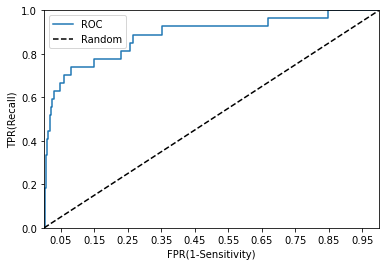

lda의 ROC AUC값: 0.8839


In [38]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
def roc_curve_plot(Same_y_test, pred_proba_c1):
    fprs, tprs, thresholds = roc_curve(Same_y_test, pred_proba_c1)
    
    plt.plot(fprs, tprs, label='ROC')
    plt.plot([0,1],[0,1], 'k--', label = 'Random')
    
    start, end= plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR(1-Sensitivity)'); plt.ylabel('TPR(Recall)')
    plt.legend()
    plt.show()
    
roc_curve_plot(Same_y_test, lda_clf.predict_proba(Same_X_test)[:,1])
pred_proba = lda_clf.predict_proba(Same_X_test)[:,1]
roc_score = roc_auc_score(Same_y_test, pred_proba)
print('lda의 ROC AUC값: {0:.4f}'.format(roc_score))


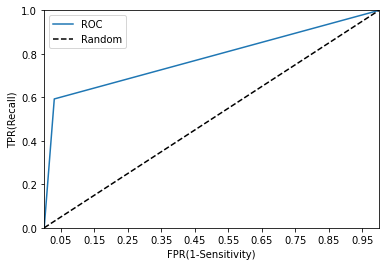

lda의 ROC AUC값: 0.7812


In [39]:
roc_curve_plot(Same_y_test, lda_clf.predict(Same_X_test))
roc_score = roc_auc_score(Same_y_test, lda_pred)
print('lda의 ROC AUC값: {0:.4f}'.format(roc_score))

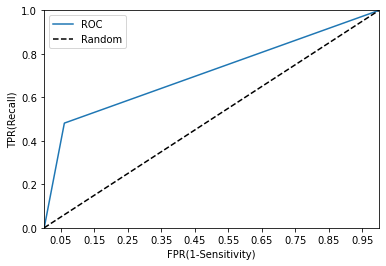

dt ROC AUC값: 0.7106


In [40]:
roc_curve_plot(Same_y_test, dt_clf.predict_proba(Same_X_test)[:,1])
pred_proba = dt_clf.predict_proba(Same_X_test)[:,1]
roc_score = roc_auc_score(Same_y_test, pred_proba)
print('dt ROC AUC값: {0:.4f}'.format(roc_score))


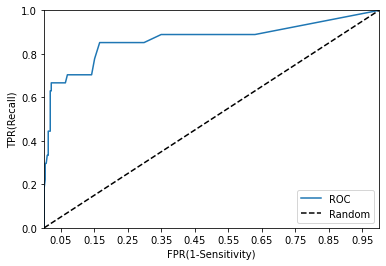

rf ROC AUC값: 0.8665


In [41]:
roc_curve_plot(Same_y_test, rf_clf.predict_proba(Same_X_test)[:,1])
pred_proba = rf_clf.predict_proba(Same_X_test)[:,1]
roc_score = roc_auc_score(Same_y_test, pred_proba)
print('rf ROC AUC값: {0:.4f}'.format(roc_score))

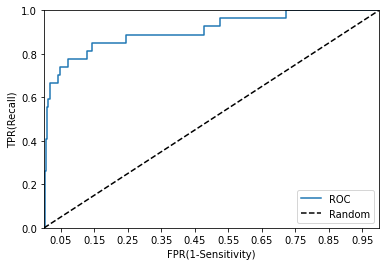

lr ROC AUC값: 0.9064


In [42]:
roc_curve_plot(Same_y_test, lr_clf.predict_proba(Same_X_test)[:,1])
pred_proba = lr_clf.predict_proba(Same_X_test)[:,1]
roc_score = roc_auc_score(Same_y_test, pred_proba)
print('lr ROC AUC값: {0:.4f}'.format(roc_score))

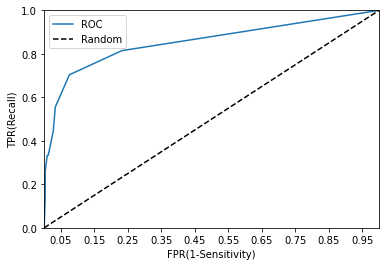

knn ROC AUC값: 0.8543


In [43]:
roc_curve_plot(Same_y_test, knn_clf.predict_proba(Same_X_test)[:,1])
pred_proba = knn_clf.predict_proba(Same_X_test)[:,1]
roc_score = roc_auc_score(Same_y_test, pred_proba)
print('knn ROC AUC값: {0:.4f}'.format(roc_score))

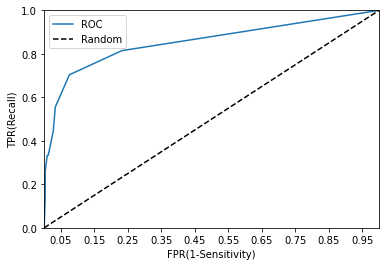

knn ROC AUC값: 0.8543


In [44]:
roc_curve_plot(Same_y_test, knn_clf.predict_proba(Same_X_test)[:,1])
pred_proba = knn_clf.predict_proba(Same_X_test)[:,1]
roc_score = roc_auc_score(Same_y_test, pred_proba)
print('knn ROC AUC값: {0:.4f}'.format(roc_score))
